# LA Q2 RideShare Analysis and Visualizations


## Introduction

I've choose to analyze and breakdown some key curiousity about the Q2 BikeShare information from LA. The link provided in the course material no longer exists so I just changed the location. There were 50,000 plus rides so to decrease run times on my personal laptop I've decided not to combine multiple quarters. I also feel that there is substantial information for me to convey all I've learned. Thank you for that!


## Table of Contents
1. [Wrangling Info](#Wrangle)
2. [Questions and Curiousities](#QC)


In [2]:
#Import libraries/packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

<a id=wrangle></a>
## Wrangling Info

The site to find the downloadable CSV file is located here: [BikeShare](https://bikeshare.metro.net/about/data/)

1. Download the .csv file for 2020 Q2 (April-June)
2. Upload into Jupyter Notebook
3. Read .csv into notebook with pd.read function
4. Programmatically better understand the DataFrame


In [3]:
#Read in .csv file as trips_df
trips_df = pd.read_csv('metro-trips-2020-q2 2.csv')
trips_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,140275793,14,4/1/2020 0:05,4/1/2020 0:19,4491,34.04744,-118.247940,4491,34.047440,-118.247940,19544,30,Round Trip,Monthly Pass,electric
1,140275993,9,4/1/2020 0:19,4/1/2020 0:28,4491,34.04744,-118.247940,4491,34.047440,-118.247940,19544,30,Round Trip,Monthly Pass,electric
2,140276293,18,4/1/2020 0:22,4/1/2020 0:40,3076,34.04060,-118.253838,3076,34.040600,-118.253838,18942,30,Round Trip,Monthly Pass,electric
3,140276793,20,4/1/2020 0:41,4/1/2020 1:01,3076,34.04060,-118.253838,3076,34.040600,-118.253838,18942,30,Round Trip,Monthly Pass,electric
4,140277293,25,4/1/2020 1:02,4/1/2020 1:27,3076,34.04060,-118.253838,3033,34.040989,-118.255798,18942,30,One Way,Monthly Pass,electric


Below are some more functions to better understand the layout and structure of the dataset.

In [5]:
#Boxplot information
trips_df.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration
count,5.420200e+04,54202.000000,54202.000000,12234.000000,12234.000000,54202.000000,51881.000000,51881.000000,54202.000000,54202.000000
mean,1.422277e+08,44.877901,3173.293532,34.048096,-118.294257,3742.290838,34.046763,-118.297073,15197.715343,39.691100
std,1.077912e+06,136.672240,452.991766,0.032350,0.069030,677.898099,0.032045,0.070583,11021.088032,80.860016
min,1.402758e+08,1.000000,3000.000000,33.958790,-118.491341,3000.000000,33.958790,-118.491341,5715.000000,1.000000
25%,1.413774e+08,10.000000,3000.000000,34.039982,-118.292183,3035.000000,34.039871,-118.296799,12283.000000,1.000000
50%,1.420787e+08,19.000000,3000.000000,34.048401,-118.262733,4249.000000,34.048038,-118.264557,16342.000000,30.000000
75%,1.431155e+08,31.000000,3000.000000,34.057720,-118.253838,4410.000000,34.057720,-118.254868,18926.000000,30.000000
max,1.444321e+08,1440.000000,4524.000000,34.186569,-118.231277,4524.000000,34.186569,-118.231277,536682.000000,999.000000


In [8]:
#Here I can immediately see many missing values from start_lat and start_lon
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54202 entries, 0 to 54201
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              54202 non-null  int64  
 1   duration             54202 non-null  int64  
 2   start_time           54202 non-null  object 
 3   end_time             54202 non-null  object 
 4   start_station        54202 non-null  int64  
 5   start_lat            12234 non-null  float64
 6   start_lon            12234 non-null  float64
 7   end_station          54202 non-null  int64  
 8   end_lat              51881 non-null  float64
 9   end_lon              51881 non-null  float64
 10  bike_id              54202 non-null  int64  
 11  plan_duration        54202 non-null  int64  
 12  trip_route_category  54202 non-null  object 
 13  passholder_type      54202 non-null  object 
 14  bike_type            54202 non-null  object 
dtypes: float64(4), int64(6), object(5)
m

In [31]:
#More of a curiousity than anything. Theory that certain start_stations don't have proper lat or lon
trips_df[trips_df.start_lat.isna()].start_station.unique()

array([4286, 4285, 3000])

In [30]:
trips_df.start_station.unique()

array([4491, 3076, 3033, 4300, 3051, 3005, 3035, 3028, 3078, 3006, 4340,
       3068, 3082, 4406, 3034, 3081, 3077, 4420, 4343, 3042, 3062, 4220,
       3031, 4401, 4442, 4475, 4456, 3008, 4496, 4275, 4353, 3026, 4273,
       3064, 4293, 4476, 4315, 4286, 3049, 4483, 3014, 4470, 3048, 4302,
       3066, 4311, 3074, 3075, 4267, 3019, 4447, 4304, 3023, 3032, 3025,
       4443, 3029, 3016, 3057, 4328, 4345, 3052, 4490, 4266, 3030, 4444,
       4437, 4254, 3007, 4389, 3056, 4455, 3040, 4379, 4385, 4404, 3065,
       4301, 4410, 4314, 3018, 4390, 4342, 4425, 3024, 3022, 4405, 4312,
       3027, 4469, 4460, 4383, 4484, 4306, 4248, 3067, 4344, 4474, 4452,
       4478, 4440, 4354, 4349, 4494, 3069, 4482, 4472, 4285, 4429, 4493,
       4341, 3063, 4500, 3047, 4334, 4445, 4329, 4250, 4479, 4323, 4330,
       4338, 4322, 3036, 4454, 4393, 4504, 4414, 4441, 4347, 4457, 3054,
       3011, 4450, 4446, 4413, 4325, 4397, 3058, 4451, 4422, 3045, 4352,
       4332, 4313, 4480, 4439, 4417, 4247, 4426, 43

If I was truely using this information to understand growth opportunites or market avaiablility I would find the lat and lon for those 3 locations but for the purpose of this assignment I won't need those values.

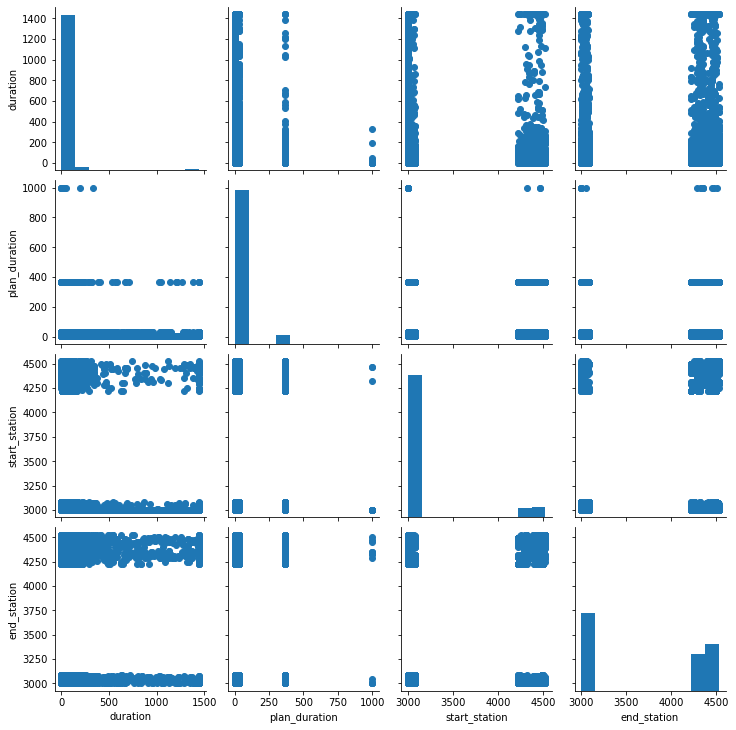

In [97]:
#Did this for fun. Weren't actually enough quatitative variables for this to make sense. Most are categorical

g = sb.PairGrid(data = trips_df, vars = ['duration', 'plan_duration', 'start_station', 'end_station'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

<a id='QC'></a>
## Questions and Curiousities

**Udacities facaulty original queries:**
1. [When are most trips taken during Q2?](#1)
2. [How long does the average trip take based on passholder type?](#2)
3. [Does the above depend on if a user is a subscriber or customer?](#3)

**Personal curiousity:**
4. [What is the most popular bike type?](#4)
5. [Does bike type have an influence on duration of ride? Total rides?](#5)

In [98]:
#Closer look at the data layout without having to scroll
trips_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,date,month
0,140275793,14,4/1/2020 0:05,4/1/2020 0:19,4491,34.04744,-118.247940,4491,34.047440,-118.247940,19544,30,Round Trip,Monthly Pass,electric,4/1/2020,April
1,140275993,9,4/1/2020 0:19,4/1/2020 0:28,4491,34.04744,-118.247940,4491,34.047440,-118.247940,19544,30,Round Trip,Monthly Pass,electric,4/1/2020,April
2,140276293,18,4/1/2020 0:22,4/1/2020 0:40,3076,34.04060,-118.253838,3076,34.040600,-118.253838,18942,30,Round Trip,Monthly Pass,electric,4/1/2020,April
3,140276793,20,4/1/2020 0:41,4/1/2020 1:01,3076,34.04060,-118.253838,3076,34.040600,-118.253838,18942,30,Round Trip,Monthly Pass,electric,4/1/2020,April
4,140277293,25,4/1/2020 1:02,4/1/2020 1:27,3076,34.04060,-118.253838,3033,34.040989,-118.255798,18942,30,One Way,Monthly Pass,electric,4/1/2020,April


<a id='1'></a>
## Question 1: When are most trips taken during Q2?

This will use the start_time information for ploting which is a qualitative variable that I plan to break down into days. Best approach would be find ride counts for each day and plot in a bar chart. 

Sense there are about 91 days that will crowd the x-axis labels meaning I'll have to update those according. I will also want to create a 'date' column that only contains the mm/dd/yyyy.

In [9]:
#import regex and test before iterating
import re
x = re.findall("(\d+/\d+/\d+)", trips_df.loc[1, 'start_time'])
x

['4/1/2020']

In [99]:
#Create a date column
trips_df['date'] = 'NaN'

#Iterate through trips_df and use regex to pull only date out of start_time column
for index, row in trips_df.iterrows():
    x = re.findall("(\d+/\d+/\d+)", trips_df.loc[index, 'start_time'])
    trips_df.loc[index, 'date'] = x

#Check column
trips_df.date.head()

0    4/1/2020
1    4/1/2020
2    4/1/2020
3    4/1/2020
4    4/1/2020
Name: date, dtype: object

In [11]:
#Check to clarify day count and optimize bin size
trips_df.date.describe()

count         54202
unique           91
top       5/24/2020
freq            916
Name: date, dtype: object

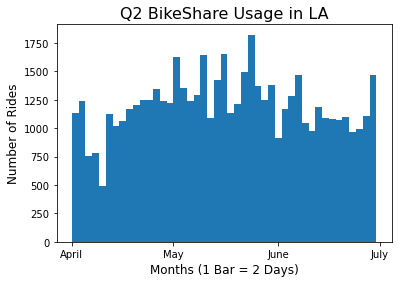

In [105]:
#Plot histogram, clean for representation
plt.hist(data=trips_df, x='date',bins=45)
plt.xticks(['4/1/2020', '5/1/2020', '6/1/2020', '7/1/2020'], ['April', 'May', 'June', 'July'])
plt.title('Q2 BikeShare Usage in LA', size=16)
plt.xlabel('Months (1 Bar = 2 Days)', size=12)
plt.ylabel('Number of Rides', size=12);

### Conclusion

There are spikes about 1 weeks time apart making me think that weekend are most popular ride times, espcially weekends in May. Graph also follows a slight increased demand into middle/end of May and then starts a downward trend into end of Jun. 

Since this is LA, this might have something to do with the heat. Between May and June might have optimal weather for bike rides or possibly a demographic change like schools getting out for the summer and students leaving.

<a id='2'></a>
## Question 2: How long does the average trip take based on passholder type?

We will want to start by grouping passholder type and finding the mean values for duration. This will allow use to easily create a DataFrame of averages and plot out graphs. We have a qualitative and quantative variable type for a bar chart will fit best. 

In [103]:
#Groupby passholder_type and get averages of duration column
averages = trips_df.groupby('passholder_type')['duration'].mean()

#Convert above to a df in order to graph
averages_df = averages.reset_index(name = 'average_trip')
averages_df


,passholder_type,average_trip
0,Annual Pass,21.505081
1,Monthly Pass,24.292063
2,One Day Pass,109.917679
3,Testing,42.562500
4,Walk-up,81.192158


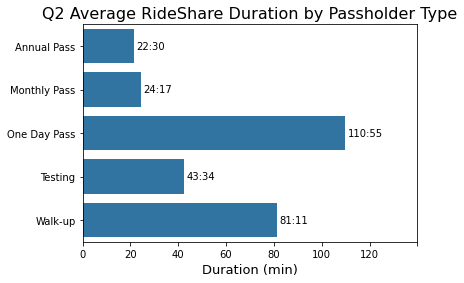

In [106]:
#Set unified color and graph average trip compared by passholder type
base_color = sb.color_palette()[0]
sb.barplot(data=averages_df, x='average_trip', y='passholder_type', color=base_color)

#Iterate through values to format and then add to bar
for i in range(averages_df.shape[0]):
    count = averages_df.average_trip[i]
    string = '{:.0f}:{:.0f}'.format(count, (int(str(count - int(count))[2:4])/100)*60) #Has to be a better way!!
    plt.text(count+1, i, string, va='center')

#Clean up bar chart to make presentable
plt.xlabel('Duration (min)', size=13)
labels = [0, 20, 40, 60, 80, 100, 120, 140]
plt.xticks(labels, [0, 20, 40, 60, 80, 100, 120, '']) #Has to be a better way to extend right side of graph!
plt.ylabel('')
plt.title('Q2 Average RideShare Duration by Passholder Type', size=16);

### Conclusion

The average RideShare duration for Annual, Monthly, One Day, Testing and Walk-up passholder types is roughly 22, 24, 110, 43, and 81 minutes respectively. One day passholders have a much higher average ride time which makes complete sense becuase they are only planning to ride that one day. They will want to take full advantage of their ride.

<a id='3'></a>
## Question 3: Does the BikeShare usage change based on passholder_type over time?

First impression here is I'm going to have to do a clustered bar chart breaking the bars based on passholder. This would mean I'd have to break the timeline into a small number of bins. This would allow the visualization to be easily understandable. Fact that we have Quantitative and 2 Qualitative variables also suggests a clusttered bar chart would work great

In [107]:
#Create a column with month
trips_df['month'] = 'NaN'

for index, row in trips_df.iterrows():
    if int(trips_df.loc[index, 'date'][:1]) == 4:
        trips_df.loc[index, 'month'] = 'April'
    elif int(trips_df.loc[index, 'date'][:1]) == 5:
        trips_df.loc[index, 'month'] = 'May'
    else:
        trips_df.loc[index, 'month'] = 'June'

#Check values of month column
trips_df.month.unique()

array(['April', 'May', 'June'], dtype=object)

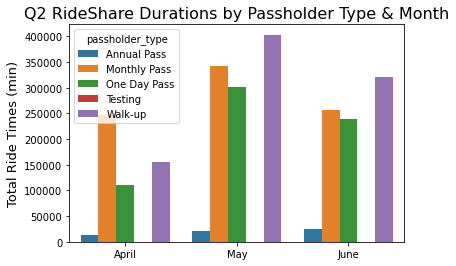

In [108]:
#Groupby passholder_type and month
counts = trips_df.groupby(['passholder_type', 'month'])['duration'].sum()

#Convert into a graphable df
counts = counts.reset_index(name='total_ride_time')

#Order the months 
month_order = ['April', 'May', 'June']
order = pd.api.types.CategoricalDtype(ordered=True, categories=month_order)
counts.month = counts.month.astype(order)

#Plot and clean
sb.barplot(data=counts, x='month', y='total_ride_time', hue='passholder_type')
plt.xlabel('')
plt.ylabel('Total Ride Times (min)', size=13)
plt.title('Q2 RideShare Durations by Passholder Type & Month', size=16);



### Conclusion

Firstly, testing passholder types are a very insignificant part of RideShares profit margin. Maybe there is a opportunity for marketing in that group.

Furthermore, every type runs a more or less bell curve during Q2 with the exception of Annual Passholders. Annual members, even though a small group respectively, have increased their total ride durations throughout Q2.

<a id='4'></a>
## Question 4: What is the most popular bike type?

Very easy visualization here. Best move would be to groupby bike type and take the total counts of each. From there we can reset the index and graph from our new DataFrame. Qualititatie and quantitative variables will make for a nice looking bar chart.

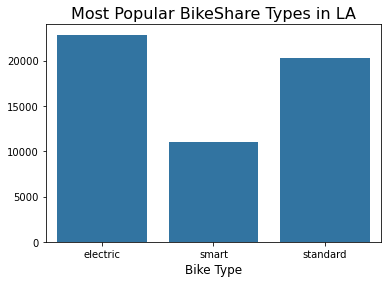

In [109]:
#Filter df for bike types
bike_types = trips_df.groupby('bike_type')['bike_type'].count()

#Convert to df from graphing
bikes_df = bike_types.reset_index(name = 'count')

#Graph counts in barchart
base_color = sb.color_palette()[0]
sb.barplot(data=bikes_df, x='bike_type', y='count', color=base_color)

#Clean up graph
plt.xlabel('Bike Type', size=12)
plt.title('Most Popular BikeShare Types in LA', size=16)
plt.ylabel('');


### Conclusion
The most popular bike type is the electric bike.

<a id='5'></a>
## Question 5: Does bike type have an influence on duration of ride? Total rides?

Need to build 2 understanding of usage here, the total number of rides and total duration of rides. Each one of these statistics are interesting in different ways. If I'm the owner, I'd want greater duration on none passholder types and less rides and smaller duration for passholders. This is for a variety of reasons but the 2 biggest are depreciation of assests and revenue.

Best course of action for both will be groupby(), reset index for new df and then use bar plots.

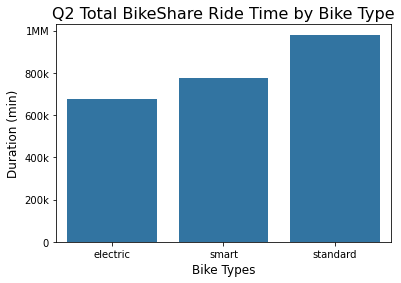

In [110]:
#Create df for total durations based on bike type
duration = trips_df.groupby('bike_type')['duration'].sum()
duration = duration.reset_index(name='total_duration')

#Create df for total rides based on bike type
count = trips_df.groupby('bike_type')['duration'].count()
count = count.reset_index(name='total_rides')

#Graph and clean
base_color = sb.color_palette()[0]

sb.barplot(data=duration, x='bike_type', y='total_duration', color=base_color)
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], [0, '200k', '400k', '600k', '800k', '1MM'])
plt.title('Q2 Total BikeShare Ride Time by Bike Type', size=16)
plt.ylabel('Duration (min)', size=12)
plt.xlabel('Bike Types', size=12);

Orginally, I had these plots side by side using subplot() but sense the yticks are of different scales it makes more sense to have them seperate.

Text(0.5, 0, 'Bike Types')

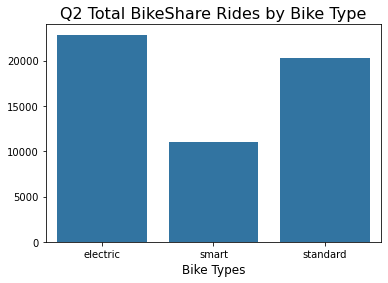

In [94]:
#Plot total ride graph, clean
sb.barplot(data=count, x='bike_type', y='total_rides', color=base_color)
plt.title('Q2 Total BikeShare Rides by Bike Type', size=16)
plt.ylabel('')
plt.xlabel('Bike Types', size=12)

### Conclusion

I actually find my results very interesting. It seems that the electric bike is the most common but the standard bike has the longest ride duration by ~300K mins meaning that the average ride for standard much be much higher. Could this be a signal to the type of people who choose one over that other?